# Training a Neural Net

- Now that we have an undertanding of what *training* is, let's try it out!
- I'll use Keras, a wrapper that takes care of the low-level configuration of TensorFlow
- Only need the concepts of *neurons*, *layers*, *activtion fucntion* etc. to build a NN in Keras 

# Training requires **data**

- Kaggle Higgs ML challenge

   - In 2014, Kaggle (online ML community) partnered with ATLAS to stage an ML competition
   - Teams were given signal ($H \rightarrow\tau \tau$) and background ($Z \rightarrow \tau \tau \;, t\bar{t} \;, W \rightarrow e/\mu$) simulation
   - The best classification performance (best *Approximate Median Significance*) wins!

    # I'll use this dataset to demo trainin a classification NN


In [1]:
import matplotlib
matplotlib.rcParams['font.size'] = 16
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense  
from keras import backend as K
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df = pd.read_csv("atlas-higgs-challenge-2014-v2.csv")
df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.240,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.000,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.000,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,1.904263,b,t,6.245333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818233,918233,105.668,46.443,60.048,156.191,0.403,47.746,0.936,1.279,6.133,...,1.190,-0.766,41.791,0.787,-1.090,154.056,0.005721,s,u,0.259892
818234,918234,99.294,30.097,62.713,65.861,3.312,471.319,-2.611,2.294,2.889,...,1.293,-0.868,70.158,-2.018,2.893,178.856,0.000461,s,u,0.020956
818235,918235,108.497,9.837,65.149,18.006,-999.000,-999.000,-999.000,2.742,18.006,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.189365,b,u,53.284258
818236,918236,96.711,20.006,66.942,29.761,-999.000,-999.000,-999.000,2.479,2.739,...,1.460,2.637,-999.000,-999.000,-999.000,30.863,0.512740,b,u,22.971060


In [3]:
#extract features, labels, and weights
Labels=df['Label']

lb = preprocessing.LabelBinarizer()
labels = lb.fit_transform(Labels)
features = df.iloc[:,1:31]

X=features
y=np.ravel(labels)

print("Number of signal events = " + str(np.count_nonzero(y == 1)))
print("Number of background events = " + str(np.count_nonzero(y == 0)))

weights = df['Weight']
weights=np.ravel(weights) 

X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X, y, weights, test_size=0.33, random_state=42, shuffle=True)

Number of signal events = 279560
Number of background events = 538678


In [4]:
# (apply final weight to each event, but give uniform weight to signal class to equalise sum of weights
#takes some manipulation!) 

df_train = pd.DataFrame()
df_train["label"] = y_train
df_train["weights"] = weights_train

sigSumWeights = np.sum(df_train[df_train["label"]==1]["weights"])
bkgSumWeights = np.sum(df_train[df_train["label"]==0]["weights"])

scale = (bkgSumWeights/sigSumWeights)
df_train.loc[df_train.label==1, "weights"] *= scale

modsigSumWeights = np.sum(df_train[df_train["label"]==1]["weights"])

final_weights_train = df_train["weights"]

In [5]:
model = Sequential()
model.add(Dense(15, input_dim=30, activation='relu', kernel_regularizer=None))
model.add(Dense(15, activation='relu', kernel_regularizer=None))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')   
model.fit(X_train, y_train, sample_weight=final_weights_train, epochs=8, batch_size=100, verbose=1)

Epoch 1/8
5483/5483 [==============================] - 3s 564us/step - loss: 1.7224
Epoch 2/8
5483/5483 [==============================] - 3s 562us/step - loss: 0.4583
Epoch 3/8
5483/5483 [==============================] - 3s 566us/step - loss: 0.4124
Epoch 4/8
5483/5483 [==============================] - 3s 591us/step - loss: 0.4030
Epoch 5/8
5483/5483 [==============================] - 3s 569us/step - loss: 0.3960
Epoch 6/8
5483/5483 [==============================] - 3s 559us/step - loss: 0.3885
Epoch 7/8
5483/5483 [==============================] - 3s 563us/step - loss: 0.3845
Epoch 8/8
5483/5483 [==============================] - 3s 558us/step - loss: 0.3811


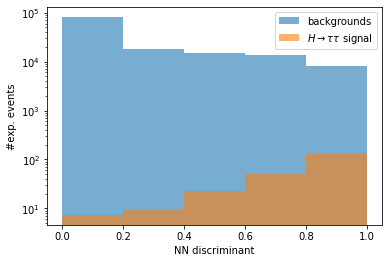

In [7]:
# plot discriminator values for "test" portion of dataset not used in training 
pred_test = model.predict(X_test)

dfNN = pd.DataFrame()
dfNN["labels"] = y_test
dfNN["predictions"] = pred_test
dfNN["weights"] = weights_test

signalVals = dfNN[dfNN['labels']== 1] 
backgroundVals = dfNN[dfNN['labels']== 0] 

plt.figure()
plt.xlabel("NN discriminant")
plt.ylabel("#exp. events")

bkgHistNN = plt.hist(backgroundVals["predictions"], bins=5, weights=backgroundVals["weights"],label="backgrounds", range=[0,1], alpha=0.6)
sigHistNN = plt.hist(signalVals["predictions"], bins=5, weights=signalVals["weights"],  label=r"$H\rightarrow \tau\tau$ signal",range=[0,1], alpha=0.6)

plt.legend()
plt.yscale('log')
plt.show()

In [8]:
def getSig(sigHist, bkgHist):

    #extract signifcance vs. discriminant.
    bins = sigHist[1]
    nSig = sigHist[0]
    nBkg = bkgHist[0]

    binCentres = (bins[:-1] + bins[1:]) / 2
    width = bins[1] - bins[0]
    sigmasNN = np.array([])
    sigmasVar = np.array([])

    for x in range(0,len(binCentres)):
        indices = [x, (len(binCentres)-1)] 
        if (nBkg[indices].sum() != 0):
            sigma = (nSig[indices].sum()) / ( np.sqrt(nBkg[indices].sum() + nBkg[indices].sum() ))
        else:
            sigma = 0.001
        sigmasNN = np.append(sigmasNN, sigma)
        
    return binCentres, sigmasNN

No handles with labels found to put in legend.


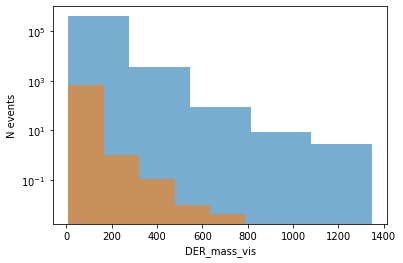

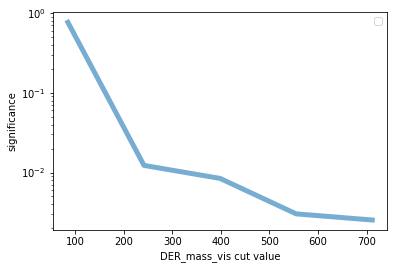

In [9]:
signalVals = df[df['Label']== "s"] 
backgroundVals = df[ df['Label']== "b"]

for var in df.columns:
    if( (var == "DER_mass_vis") ):   
        plt.yscale('log')
        plt.xlabel(var)
        plt.ylabel("N events")
        bkgHist = plt.hist(backgroundVals[var], bins=5, weights=backgroundVals["Weight"], label="backgrounds", alpha=0.6)
        sigHist = plt.hist(signalVals[var], bins=5, weights=signalVals["Weight"], label=r"$H\rightarrow \tau\tau$ signal", alpha=0.6)
        binCentres, sigmas = getSig(sigHist, bkgHist)
        #make comparison plot
        fig, ax1 = plt.subplots()
        plt.xlabel(var + " cut value")
        plt.ylabel("significance")
        ax1.plot(binCentres, sigmas, lw=5, alpha=0.6)
        plt.legend() 
        plt.yscale('log')
        plt.show()

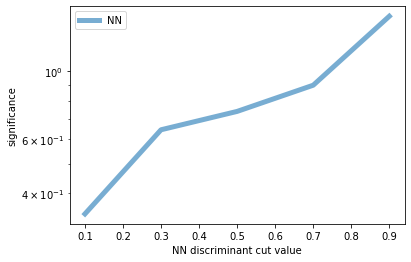

In [10]:
#make comparison plot
fig, ax1 = plt.subplots()
plt.xlabel("NN discriminant cut value")
plt.ylabel("significance")
plt.yscale('log')
binCentres, sigmasNN = getSig(sigHistNN, bkgHistNN)

ax1.plot(binCentres, sigmasNN, label="NN", lw=5, alpha=0.6)
plt.legend()    
plt.show()